#### Lightgbm small intro

In [2]:
# !pip install lightgbm

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import lightgbm as lgb

In [15]:
dataset = load_breast_cancer()

# keep only these features
feature_names = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness']
mask = [1 if x in feature_names else 0 for x in dataset['feature_names']]

X = dataset['data']
y = dataset['target'].astype(bool)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [21]:
y_pred=clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print(f'LightGBM Model accuracy score: {accuracy_score(y_test, y_pred):.3f}')
print(f'Training-set accuracy score: {accuracy_score(y_train, y_pred_train):.3f}')

LightGBM Model accuracy score: 0.982
Training-set accuracy score: 1.000


<Axes: >

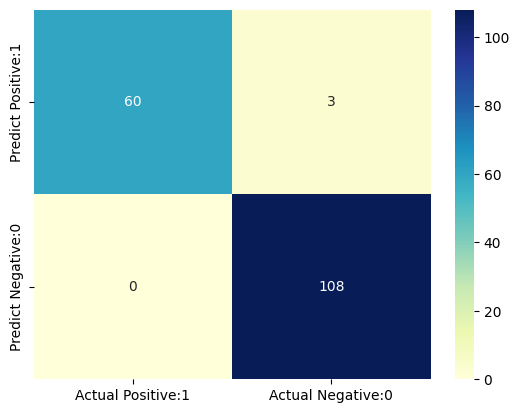

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Another way to create model is by using `lgb` wrappers:

In [11]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [26]:
params = {
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.1,
    "verbose": 0,
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=20,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [27]:
print(f'LightGBM Model accuracy score: {accuracy_score(y_test, gbm.predict(X_test) > 0.5):.3f}')
print(f'Training-set accuracy score: {accuracy_score(y_train, gbm.predict(X_train) > 0.5):.3f}')

LightGBM Model accuracy score: 0.953
Training-set accuracy score: 0.982


---